In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
print(x_train.shape)
print(x_test.shape)
x_train = np.expand_dims(x_train, axis=-1) # Add channel dimension
x_test = np.expand_dims(x_test, axis=-1)
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


In [ ]:
print(y_train[0])

5


In [ ]:
model = keras.Sequential([
layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
layers.MaxPooling2D((2, 2)),
layers.Conv2D(64, (3, 3), activation="relu"),
layers.MaxPooling2D((2, 2)),
layers.Flatten(),
layers.Dense(128, activation="relu"),
layers.Dense(10, activation="softmax") # 10 classes for MNIST digits
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer="adam",

loss="sparse_categorical_crossentropy", # labels are in integer
metrics=["accuracy"])

In [ ]:
model.fit(x_train, y_train, epochs=1, batch_size=32, validation_data=(x_test, y_test))

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 28ms/step - accuracy: 0.9096 - loss: 0.2886 - val_accuracy: 0.9844 - val_loss: 0.0446


In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9810 - loss: 0.0520
Test accuracy: 0.9844


In [ ]:
predictions = model.predict(x_test[:5])
print(predictions.shape)
predicted_labels = np.argmax(predictions, axis=1)
print("Predicted labels:", predicted_labels)
print("Actual labels: ", y_test[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
(5, 10)
Predicted labels: [7 2 1 0 4]
Actual labels:  [7 2 1 0 4]


# Mount Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# Task-1 Data Understanding and Visualization:

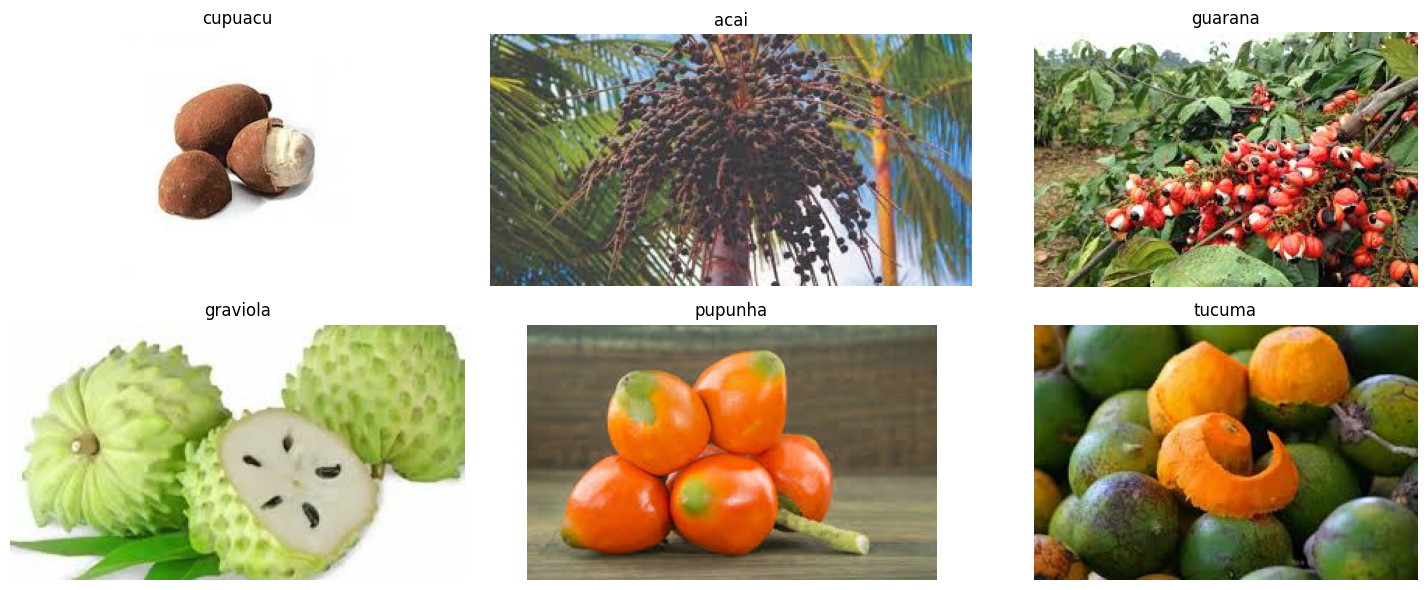

In [3]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to the training dataset
train_dir = "/content/drive/MyDrive/AI_AND_MACHINE_LEARNING/Workshop-5/FruitinAmazon/train"

# Get the list of class directories
class_dirs = [d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))]

# Select one random image from each class
selected_images = []
labels = []
for class_name in class_dirs:
    class_path = os.path.join(train_dir, class_name)
    images = [img for img in os.listdir(class_path) if img.lower().endswith(('png', 'jpg', 'jpeg'))]
    if images:
        selected_image = random.choice(images)
        selected_images.append(os.path.join(class_path, selected_image))
        labels.append(class_name)

# Display images in a grid format (2 rows)
num_classes = len(selected_images)
cols = (num_classes + 1) // 2  # Adjust columns based on the number of classes
fig, axes = plt.subplots(2, cols, figsize=(15, 6))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, (img_path, label) in enumerate(zip(selected_images, labels)):
    img = mpimg.imread(img_path)
    axes[i].imshow(img)
    axes[i].set_title(label)
    axes[i].axis("off")

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()


In [4]:
import os
from PIL import Image

train_dir = "/content/drive/MyDrive/AI_AND_MACHINE_LEARNING/Workshop-5/FruitinAmazon/train"

corrupted_images = []

# Iterate through each class subdirectory
for class_name in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_name)

    if os.path.isdir(class_path):
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            try:
                with Image.open(img_path) as img:
                    img.verify()
            except (IOError, SyntaxError):
                corrupted_images.append(img_path)
                os.remove(img_path)
                print(f"Removed corrupted image: {img_path}")

# Final status message
if not corrupted_images:
    print("No corrupted images found.")


No corrupted images found.


# Task 2: Loading and Preprocessing Image Data in keras:

In [10]:
import tensorflow as tf

img_height = 128
img_width = 128
batch_size = 32
validation_split = 0.2

train_dir = "/content/drive/MyDrive/AI_AND_MACHINE_LEARNING/Workshop-5/FruitinAmazon/train"

rescale = tf.keras.layers.Rescaling(1./255)

# Create training dataset with normalization
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels="inferred",
    label_mode="int",
    image_size=(img_height, img_width),
    interpolation="nearest",
    batch_size=batch_size,
    shuffle=True,
    validation_split=validation_split,
    subset="training",
    seed=123
)
train_ds = train_ds.map(lambda x, y: (rescale(x), y))

# Create validation dataset with normalization
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels="inferred",
    label_mode="int",
    image_size=(img_height, img_width),
    interpolation="nearest",
    batch_size=batch_size,
    shuffle=False,
    validation_split=validation_split,
    subset="validation",
    seed=123
)

val_ds = val_ds.map(lambda x, y: (rescale(x), y))


Found 90 files belonging to 6 classes.
Using 72 files for training.
Found 90 files belonging to 6 classes.
Using 18 files for validation.


# Task 3 - Implement a CNN with

In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the CNN model
model = keras.Sequential([
    # Convolutional Layer 1
    layers.Conv2D(filters=32, kernel_size=(3, 3), padding="same", strides=1, activation="relu", input_shape=(128, 128, 3)),

    layers.MaxPooling2D(pool_size=(2, 2), strides=2),

    layers.Conv2D(filters=32, kernel_size=(3, 3), padding="same", strides=1, activation="relu"),

    layers.MaxPooling2D(pool_size=(2, 2), strides=2)
])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,144 (39.62 KB)

 Trainable params: 10,144 (39.62 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the CNN model
model = keras.Sequential([

    layers.Conv2D(filters=32, kernel_size=(3, 3), padding="same", strides=1, activation="relu", input_shape=(128, 128, 3)),

    layers.MaxPooling2D(pool_size=(2, 2), strides=2),

    layers.Conv2D(filters=32, kernel_size=(3, 3), padding="same", strides=1, activation="relu"),

    layers.MaxPooling2D(pool_size=(2, 2), strides=2),

    layers.Flatten(),

    layers.Dense(64, activation="relu"),

    layers.Dense(128, activation="relu"),

    # Output Layer (number of neurons = number of classes)
    layers.Dense(num_classes, activation="softmax")  # Softmax for multi-class classification
])

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       2,097,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,116,454 (8.07 MB)

 Trainable params: 2,116,454 (8.07 MB)

 Non-trainable params: 0 (0.00 B)

# Task 4: Train the Model

In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks

# Define the CNN model
model = keras.Sequential([
    # Convolutional Layer 1
    layers.Conv2D(filters=32, kernel_size=(3,3), padding="same", strides=1, activation="relu", input_shape=(128, 128, 3)),
    layers.MaxPooling2D(pool_size=(2,2), strides=2),

    # Convolutional Layer 2
    layers.Conv2D(filters=32, kernel_size=(3,3), padding="same", strides=1, activation="relu"),
    layers.MaxPooling2D(pool_size=(2,2), strides=2),

    # Flatten and Fully Connected Layer
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# Define callbacks
checkpoint_cb = callbacks.ModelCheckpoint("best_model.h5", save_best_only=True, monitor="val_loss", mode="min")
early_stopping_cb = callbacks.EarlyStopping(patience=10, restore_best_weights=True, monitor="val_loss", mode="min")

# Train the model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    batch_size=16,
    epochs=250,
    callbacks=[checkpoint_cb, early_stopping_cb]
)

# Save the final trained model
model.save("final_model.h5")


Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step - accuracy: 0.0845 - loss: 3.6692

3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 713ms/step - accuracy: 0.0877 - loss: 3.8262 - val_accuracy: 0.8333 - val_loss: 1.1218
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 811ms/step - accuracy: 0.1753 - loss: 2.4177 - val_accuracy: 0.0000e+00 - val_loss: 2.0944
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 718ms/step - accuracy: 0.4310 - loss: 1.6154 - val_accuracy: 0.3889 - val_loss: 1.6851
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 530ms/step - accuracy: 0.3494 - loss: 1.5059 - val_accuracy: 0.5556 - val_loss: 1.5467
Epoch 5/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step - accuracy: 0.4485 - loss: 1.3636

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 602ms/step - accuracy: 0.4579 - loss: 1.3609 - val_accuracy: 0.6111 - val_loss: 1.1059
Epoch 6/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step - accuracy: 0.5098 - loss: 1.0990

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 593ms/step - accuracy: 0.5109 - loss: 1.0953 - val_accuracy: 0.5556 - val_loss: 0.9991
Epoch 7/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 627ms/step - accuracy: 0.7960 - loss: 0.8051 - val_accuracy: 0.5000 - val_loss: 1.1193
Epoch 8/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 576ms/step - accuracy: 0.8605 - loss: 0.6001

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 834ms/step - accuracy: 0.8572 - loss: 0.5928 - val_accuracy: 0.9444 - val_loss: 0.5619
Epoch 9/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step - accuracy: 0.9155 - loss: 0.3562

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 532ms/step - accuracy: 0.9123 - loss: 0.3650 - val_accuracy: 0.9444 - val_loss: 0.4781
Epoch 10/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 516ms/step - accuracy: 0.9891 - loss: 0.2002 - val_accuracy: 0.6667 - val_loss: 0.6916
Epoch 11/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 532ms/step - accuracy: 0.9596 - loss: 0.1876 - val_accuracy: 0.8333 - val_loss: 0.5220
Epoch 12/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step - accuracy: 1.0000 - loss: 0.0902

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 550ms/step - accuracy: 1.0000 - loss: 0.0881 - val_accuracy: 0.8889 - val_loss: 0.4555
Epoch 13/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 553ms/step - accuracy: 1.0000 - loss: 0.0837

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 826ms/step - accuracy: 1.0000 - loss: 0.0843 - val_accuracy: 0.8889 - val_loss: 0.3807
Epoch 14/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 688ms/step - accuracy: 1.0000 - loss: 0.0341 - val_accuracy: 0.7778 - val_loss: 0.4803
Epoch 15/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 457ms/step - accuracy: 1.0000 - loss: 0.0319 - val_accuracy: 0.8889 - val_loss: 0.3848
Epoch 16/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 728ms/step - accuracy: 1.0000 - loss: 0.0157 - val_accuracy: 0.8889 - val_loss: 0.3925
Epoch 17/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step - accuracy: 1.0000 - loss: 0.0150

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 605ms/step - accuracy: 1.0000 - loss: 0.0149 - val_accuracy: 0.8889 - val_loss: 0.3046
Epoch 18/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step - accuracy: 1.0000 - loss: 0.0061

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 605ms/step - accuracy: 1.0000 - loss: 0.0060 - val_accuracy: 0.8889 - val_loss: 0.2529
Epoch 19/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 785ms/step - accuracy: 1.0000 - loss: 0.0042 - val_accuracy: 0.7778 - val_loss: 0.3238
Epoch 20/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 681ms/step - accuracy: 1.0000 - loss: 0.0046 - val_accuracy: 0.8889 - val_loss: 0.2692
Epoch 21/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 546ms/step - accuracy: 1.0000 - loss: 0.0025 - val_accuracy: 0.8889 - val_loss: 0.2612
Epoch 22/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 519ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 0.8889 - val_loss: 0.2914
Epoch 23/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 542ms/step - accuracy: 1.0000 - loss: 0.0017 - val_accuracy: 0.8889 - val_loss: 0.3309
Epoch 24/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 0.8889 - val_loss: 0.3751
Epoch 25/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 570ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 0.8889 - val_loss:

# Task 5: Evaluate the Model

In [12]:
# Assuming you have a test dataset loaded as `test_ds`
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/AI_AND_MACHINE_LEARNING/Workshop-5/FruitinAmazon/train",
    labels="inferred",
    label_mode="int",
    image_size=(128, 128),
    batch_size=16,
    shuffle=False
)

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_ds)

# Print test results
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Found 90 files belonging to 6 classes.
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 0.9522 - loss: 52.1713 
Test Loss: 59.5603
Test Accuracy: 0.9222


# Task 6: Save and Load the Model

In [15]:
model.save("trained_model.h5")

In [16]:

loaded_model = tf.keras.models.load_model("trained_model.h5")

# Evaluate the loaded model on the test dataset
test_loss, test_accuracy = loaded_model.evaluate(test_ds)

# Print the test results
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 208ms/step - accuracy: 0.9522 - loss: 52.1713
Test Loss: 59.5603
Test Accuracy: 0.9222


# Task 7: Predictions and Classification Report